In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
import matplotlib.ticker as ticker
from matplotlib import rcParams

%matplotlib inline
pd.options.display.max_columns = None

In [2]:
crash = pd.read_csv("CrashReport2014.csv")

C:\Users\Estrella\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (0,19,54,55,63,64,65,66) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
crash.head()

,OBJECTID,geodb_oid,ROUTE,YEAR,MONTH,DAY,HOUR,DAY_O_WEEK,NUM_VEH,INJURIES,FATALITIES,COLL_TYPE,WEATHER,LIGHTING,SURF_COND,RD_DEFECT,RD_FEATURE,TRAF_CNTRL,COUNTY,TOWNSHIP,TS_ROUTE,MILE,CITY,DRIVER_1,VEH1_TYPE,VEH1_SPECL,VEH1_DIR,VEH1_MANUV,VEH1_EVNT1,VEH1_LOC1,VEH1_EVNT2,VEH1_LOC2,VEH1_EVNT3,VEH1_LOC3,DRIVER_2,VEH2_TYPE,VEH2_SPECL,VEH2_DIR,VEH2_MANUV,VEH2_EVNT1,VEH2_LOC1,VEH2_EVNT2,VEH2_LOC2,VEH2_EVNT3,VEH2_LOC3,DRIVER_3,VEH3_TYPE,VEH3_SPECL,VEH3_DIR,VEH3_MANUV,VEH3_EVNT1,VEH3_LOC1,VEH3_EVNT2,VEH3_LOC2,VEH3_EVNT3,VEH3_LOC3,DRIVER_4,VEH4_TYPE,VEH4_SPECL,VEH4_DIR,VEH4_MANUV,VEH4_EVNT1,VEH4_LOC1,VEH4_EVNT2,VEH4_LOC2,VEH4_EVNT3,VEH4_LOC3,DUP_CD,REC_TYPE,XCOORD,YCOORD,INTERSEC,SFE,AGENCY_NUM,RUNDATE,WorkZone,WorkZoneTy,WorkersPre,ExceedSpee,CellPhoneU
0,1894,5331,NaN,14,3,5,12,Wed,1,0,0,Other Object,Clear,Daylight,Snow or Slush,No Defects,Not Applicable,No Controls,43,5,0,0.00,Unincorporated,Normal,Passenger,Personal,North,Skidding/Control Loss,Ran Off Roadway,Off Pavement - Right,Other Object,Off Pavement - Right,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.300000e+08,PD,2.173041e+06,2.124710e+06,N,X000079121,20043,2016090504,N,(N/A),N,N,N
1,3601,9379,NaN,14,3,19,6,Wed,1,0,0,Fixed Object,Rain,"Darkness, Lighted Road",Wet,No Defects,Not Applicable,No Controls,16,0,0,0.00,Chicago,Normal,Tractor With Semi-Trailer,Commercial-Multi-Unit,East,Turning Left,Ran Off Roadway,Other,Guardrail End,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.600000e+08,PD,3.014480e+06,1.853341e+06,N,C130096841,11051,2016090504,N,(N/A),N,N,N
2,4740,11829,NaN,14,1,9,21,Thu,1,0,0,Other Non-Collision,Clear,Darkness,Snow or Slush,No Defects,Not Applicable,NaN,81,8,0,0.00,Unincorporated,Normal,Passenger,Personal,West,Straight Ahead,Ran Off Roadway,Off Pavement - Left,Fire/Explosion,Off Pavement - Left,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.100000e+08,PD,2.257503e+06,1.843623e+06,Y,M2419584,20081,2016090504,N,(N/A),N,N,N
3,6347,15999,IL084,14,5,10,14,Sat,2,1,0,Rear End,Clear,Daylight,Dry,No Defects,Not Applicable,No Controls,98,1,5084,30.16,Albany,Normal,Passenger,Personal,South,Straight Ahead,Motor Vehicle In Traffic,On Pavement (Roadway),NaN,NaN,NaN,NaN,Normal,Passenger,Personal,South,Slow/Stop - Left Turn,Motor Vehicle In Traffic,On Pavement (Roadway),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.850840e+08,B-Injury,2.280847e+06,1.865087e+06,Y,M2443053,30001,2016090504,N,(N/A),N,N,N
4,10776,28882,NaN,14,4,28,17,Mon,2,0,0,Sideswipe Same Direction,Rain,Daylight,NaN,No Defects,Not Applicable,No Controls,16,0,0,0.00,Chicago,Normal,Tractor With Semi-Trailer,Other,South,Straight Ahead,Motor Vehicle In Traffic,On Pavement (Roadway),NaN,NaN,NaN,NaN,Normal,Passenger,Personal,South,Straight Ahead,Motor Vehicle In Traffic,On Pavement (Roadway),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.600000e+08,PD,3.015045e+06,1.848749e+06,N,C110178811,11051,2016090504,N,(N/A),N,N,N


In [ ]:
crash.info()

<AxesSubplot:xlabel='COUNTY'>

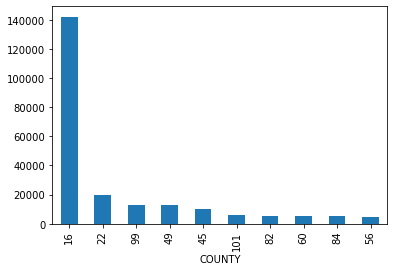

In [4]:
# Count of collision by county
cty = crash[["HOUR","COUNTY"]]

county_c = cty.groupby('COUNTY').size().sort_values(ascending=False)
county_c.head(10).plot.bar()



In [5]:
# Count values of collisions by county
crash['freq_county'] = crash['COUNTY'].map(crash['COUNTY'].value_counts())

In [6]:
# Percentage of collision per population
pop = pd.read_csv("countyPopulationIL.csv")
pop.reset_index(inplace=True)
pop=pop.rename(columns={'index':'COUNTY'})


In [7]:
pop = pop.merge(crash,how='inner')
col_list = ['COUNTY','County_name','1-Apr-10','freq_county']
pop = pop[col_list]


In [8]:
# pop.COUNTY.unique()
pop=pop.drop_duplicates()


In [9]:
# Percentage calculation
# Check types
# display(pop.dtypes)

# Convert type
pop["1-Apr-10"]= pop["1-Apr-10"].astype(int)

# Create percent column
pop['percent'] =(pop['freq_county']/pop['1-Apr-10'])*100



In [21]:
pop.head(35)

,COUNTY,County_name,1-Apr-10,freq_county,percent
261917,85,Schuyler,7544,252,3.340403
175598,25,Effingham,34242,1057,3.086852
180982,36,Henderson,7331,217,2.960033
246260,75,Pike,16430,477,2.903226
268769,95,Washington,14716,405,2.752107
10259,16,Cook,5194675,142121,2.735898
269535,97,White,14665,392,2.673031
246930,78,Putnam,6006,157,2.614053
152843,18,Cumberland,11048,288,2.606807
3626,7,Calhoun,5089,129,2.534879


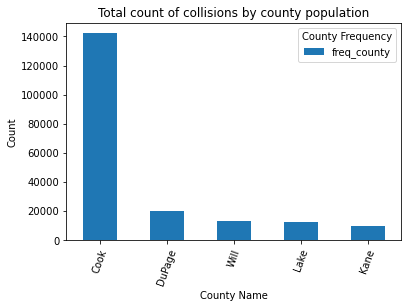

In [10]:
# Top 5 of Total count of collision by county population
pop=pop.sort_values(by='freq_county',ascending=False)
pop.head(5).plot.bar(x="County_name",y="freq_county",rot=70,title="Total count of collisions by county population")

plt.xlabel('County Name')
plt.ylabel('Count')
plt.legend(title = 'County Frequency')


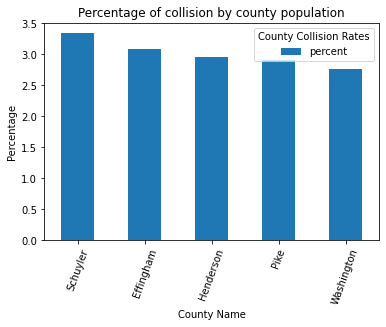

In [11]:
# Percentage of collision by county population
pop=pop.sort_values(by='percent',ascending=False)
pop.head(5).plot.bar(x="County_name",y="percent",rot=70,title="Percentage of collision by county population")

plt.xlabel('County Name')
plt.ylabel('Percentage')
plt.legend(title = 'County Collision Rates')


In [12]:
# Crash with fatalities only
crash_copy = crash.copy()
fatal_crash = crash_copy[(crash_copy['FATALITIES']) >0]



In [13]:
# Count values of collisions by county
fatal_crash['freq_county_fatal'] = fatal_crash['COUNTY'].map(fatal_crash['COUNTY'].value_counts())


<ipython-input-13-9119786efef1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fatal_crash['freq_county_fatal'] = fatal_crash['COUNTY'].map(fatal_crash['COUNTY'].value_counts())


In [14]:
# Merging both datasets
pop_fatal = pop.merge(fatal_crash,how='inner')
col_list = ['COUNTY','County_name','1-Apr-10','freq_county_fatal']
pop_fatal = pop_fatal[col_list]



In [15]:
# Unique values only
pop_fatal=pop_fatal.drop_duplicates()


In [16]:
# fatal collision Percentage calculation

pop_fatal["1-Apr-10"]= pop_fatal["1-Apr-10"].astype(int)

# Create percent column
pop_fatal['percent_fatal'] =(pop_fatal['freq_county_fatal']/pop_fatal['1-Apr-10'])*100


In [19]:
pop_fatal.head()

,COUNTY,County_name,1-Apr-10,freq_county_fatal,percent_fatal
647,88,Stark,5994,3,0.050050
838,35,Hardin,4320,2,0.046296
13,95,Washington,14716,6,0.040772
698,62,Marshall,12640,4,0.031646
352,26,Fayette,22140,7,0.031617


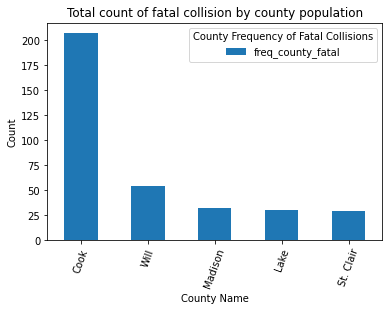

In [17]:
# Top 5 of Total count of fatal collision by county population
pop_fatal=pop_fatal.sort_values(by='freq_county_fatal',ascending=False)
pop_fatal.head(5).plot.bar(x="County_name",y="freq_county_fatal",rot=70,title="Total count of fatal collision by county population")
plt.xlabel('County Name')
plt.ylabel('Count')
plt.legend(title = 'County Frequency of Fatal Collisions')

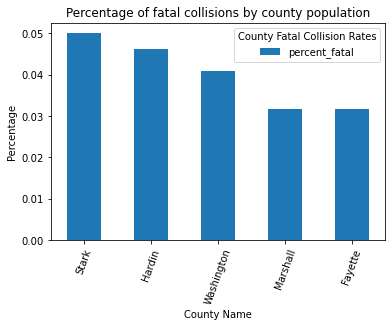

In [18]:
# Percentage of fatal collision by county population
pop_fatal=pop_fatal.sort_values(by='percent_fatal',ascending=False)
pop_fatal.head(5).plot.bar(x="County_name",y="percent_fatal",rot=70,title="Percentage of fatal collisions by county population")
plt.xlabel('County Name')
plt.ylabel('Percentage')
plt.legend(title = 'County Fatal Collision Rates')

In [29]:
# pop_crash = popo
pop_crash = pop.merge(pop_fatal,how='inner')

# Create percent column
pop_crash['rate_fatal_collision'] =(pop_crash['freq_county_fatal']/pop_crash['freq_county'])*100

pop_crash

,COUNTY,County_name,1-Apr-10,freq_county,percent,freq_county_fatal,percent_fatal,rate_fatal_collision
0,85,Schuyler,7544,252,3.340403,2,0.026511,0.793651
1,25,Effingham,34242,1057,3.086852,7,0.020443,0.662252
2,36,Henderson,7331,217,2.960033,2,0.027281,0.921659
3,75,Pike,16430,477,2.903226,2,0.012173,0.419287
4,95,Washington,14716,405,2.752107,6,0.040772,1.481481
...,...,...,...,...,...,...,...,...
88,31,Greene,13886,192,1.382688,1,0.007201,0.520833
89,102,Woodford,38664,519,1.342334,3,0.007759,0.578035
90,65,Menard,12705,162,1.275089,2,0.015742,1.234568
91,21,Douglas,19980,241,1.206206,3,0.015015,1.244813


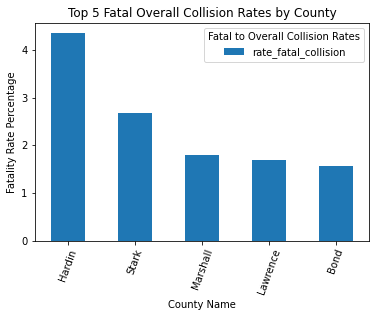

In [39]:
# Percentage of fatal collision versus non-fatal
pop_crash=pop_crash.sort_values(by='rate_fatal_collision',ascending=False)
pop_crash.head(5).plot.bar(x="County_name",y="rate_fatal_collision",rot=70,title="Top 5 Fatal Overall Collision Rates by County")
plt.xlabel('County Name')
plt.ylabel('Fatality Rate Percentage')
plt.legend(title = 'Fatal to Overall Collision Rates')

In [35]:
pop_crash

,COUNTY,County_name,1-Apr-10,freq_county,percent,freq_county_fatal,percent_fatal,rate_fatal_collision
92,35,Hardin,4320,46,1.064815,2,0.046296,4.347826
57,88,Stark,5994,112,1.868535,3,0.050050,2.678571
62,62,Marshall,12640,223,1.764241,4,0.031646,1.793722
65,51,Lawrence,16833,294,1.746569,5,0.029704,1.700680
61,3,Bond,17768,319,1.795362,5,0.028140,1.567398
...,...,...,...,...,...,...,...,...
60,98,Whiteside,58498,1056,1.805190,2,0.003419,0.189394
5,16,Cook,5194675,142121,2.735898,207,0.003985,0.145651
29,29,Fulton,37069,783,2.112277,1,0.002698,0.127714
22,22,DuPage,916924,19910,2.171390,23,0.002508,0.115520
